# <span style="color:RoyalBlue">ANÁLISIS COMPARATIVO DE LA INFLACIÓN Y LOS BONOS 10Y ENTRE PAÍSES (2010-2024)</span> 

---

**Autor:** <span style="color:SteelBlue"> Hesham Gaber</span>    
**Centro:**<span style="color:SteelBlue"> Ironhack</span>    
**Curso:**<span style="color:SteelBlue"> Data Analytics</span>    
**Año:**<span style="color:SteelBlue"> 2025</span>     

---

### ÍNDICE
1. [Introducción](#Introducción)
2. [Objetivos](#Objetivos)
3. [Metodología](#Metodología)
4. [Paquetes](#Paquetes-usados-en-el-análisis)
5. [Lectura de datos](#Lectura-de-bases-de-datos)
6. [Limpieza de datos](#Limpieza-de-los-datos)       
   [1. Comprobación de tipos de columnas](#1.-Comprobación-de-tipos-de-columnas)    
   [2. Revisión y manejo de valores faltantes](#2.-Revisión-y-manejo-de-valores-faltantes)       
7. [Análisis Exploratorio](#Análisis-Exploratorio)   
   [1. Estadísticas descriptivas](#1.-Estadísticas-descriptivas)     
   [2. Distribuciones de variables](#2.-Distribución-de-inflación-y-rendimientos-de-bonos-10Y)     
   [3. Tendencias temporales por país](#3.-Tendencias-temporales-por-país)     
   [4. Correlación entre las variables](#4.-Correlación-entre-inflación-y-rendimiento-de-los-bonos-a-10-años)     
   [5. Detección de outliers](#5.-Detección-de-outliers)      
8. [Modelos de Series Temporales](#Modelos-de-Series-Temporales)
   

---


## <span style="color:SteelBlue">Introducción</span>
En un entorno económico globalizado, la **inflación y los rendimientos de los bonos soberanos** son indicadores clave para evaluar la salud económica y el atractivo de inversión de cada país. La inflación refleja la variación de los precios en una economía y afecta directamente el poder adquisitivo y la rentabilidad de los activos financieros. Por su parte, los rendimientos de los bonos a 10 años (10Y) proporcionan información sobre las expectativas de los inversores respecto a la estabilidad económica y las tasas de interés a largo plazo.

El presente **análisis comparativo** abarca el período **2010-2024** e integra datos de inflación y rendimientos de bonos de diversos países. El objetivo es **identificar patrones, diferencias significativas y oportunidades de inversión**, así como proporcionar una base para **proyecciones y predicciones futuras**. Este enfoque permite a los inversores y analistas comprender mejor el **riesgo y la rentabilidad relativa** entre países, optimizando la toma de decisiones financieras internacionales.

## <span style="color:SteelBlue">Objetivos</span>

### Objetivo general
Analizar la relación entre inflación y bonos a 10 años en distintos países, para identificar los países con mejores oportunidades de inversión. 

### Objetivos específicos
1. Explorar tendencias de inflación y bonos en USA, Alemania, Reino Unido, Japón y España, incluyendo eventos clave como COVID‑19 o shocks inflacionarios.
2. Predecir la relación inflación–bonos con modelos econométricos y de Machine Learning.
3. Comparar resultados entre países y generar un ranking de inversión según rentabilidad, estabilidad y precisión.

## <span style="color:SteelBlue">Metodología</span>

Para este análisis comparativo se siguieron los siguientes criterios:

1. **Selección de países y periodo de estudio**:  
   Se consideraron cinco países representativos: USA, Alemania, Reino Unido, Japón y España. El período analizado abarca desde 2010 hasta 2024, ya que para 2025 solo se dispone de información parcial de los rendimientos de bonos a 10 años y no hay datos completos de inflación. Todos los datos de cada año corresponden a diciembre.
   

2. **Recolección de datos**:  
   - **Inflación**: Se obtuvieron los datos de inflación anual de Kaggle (https://www.kaggle.com/datasets/everget/government-bonds/data) .  
   - **Bonos a 10 años (10Y)**: Los rendimientos de los bonos soberanos a 10 años se recopilaron de World Government Bonds (https://www.worldgovernmentbonds.com/?utm_source=chatgpt.com#google_vignette)

3. **Organización de los datos**:  
   - Todos los datos fueron consolidados en dos archivos CSV con las siguientes columnas: 
     - Archivo de inflacion: `country`, `year`, `inflation`.
     - Archivo de yield:`country`, `year`,`10Y_bond_yield`. 
   - Se garantizó que cada fila representara los valores al cierre del año correspondiente (diciembre).
   
---


## <span style="color:SteelBlue">Paquetes usados en el análisis</span>

In [1]:
# Standard library imports
import os
import re
import warnings
from math import sqrt
from pathlib import Path

# Data science and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle


# Scientific computing
from scipy import stats

# Statistics and econometrics
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR

# Machine learning
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from scipy.stats import t as student_t

# Suppress warnings
warnings.filterwarnings("ignore")

## <span style="color:SteelBlue">Lectura de bases de datos</span>

El primer paso consiste en localizar los directorios donde se encuentran las bases de datos, para poder acceder a ellos correctamente en el análisis. Para mayor claridad, se utilizarán los siguientes nombres de referencia:

- El directorio de la base de datos sobre inflación se definirá como **`inflation_path`**.  
- El directorio de la base de datos sobre los rendimientos de bonos a 10 años se definirá como **`bond_yield_path`**.  

In [6]:
# Path de la bases de datos
inflation_path = r"C:\Users\ragha\OneDrive\Desktop\IRONHACK_PROYECTO\world_bank_data.csv"
bond_yield_path = r"C:\Users\ragha\OneDrive\Desktop\IRONHACK_PROYECTO\10Y_Bond_Yields.csv"

Una vez definidos los directorios, se procede a realizar la lectura de las mismas donde:
- La base de datos de inflacion recibirá el nombre de **`df_inflation`**.
- La base de datos de rendimientos de bonos a 10 años recibirá el nombre de **`df_bond_yield`**.

In [11]:
# Lectura de las bases de datos
df_inflation = pd.read_csv(inflation_path)
df_bond_yield = pd.read_csv(bond_yield_path)

In [12]:
# Visualización de la base de datos de inflación por pais y año
df_inflation.head()

,country,country_id,year,inflation,GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.14015,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.38430,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.66554,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.57673,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.83906,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


In [13]:
# Visualización de la base de datos de rendimientos de bonos a 10 años por pais y año
df_bond_yield.head()

,country,year,10Y_bond_yield
0,Switzerland,2025,0.267
1,Switzerland,2024,0.287
2,Switzerland,2023,0.651
3,Switzerland,2022,1.570
4,Switzerland,2021,-0.163


En la base de datos de **inflación** se observa la presencia de múltiples variables económicas, entre ellas:  

- **`country`**: país de interés.  
- **`year`**: año de referencia del estudio.
- **`GDP (Current USD)`** → PIB en dólares corrientes.  
- **`GDP per Capita`** → PIB per cápita.  
- **`GDP Growth (% Annual)`** → Crecimiento anual del PIB.  
- **`Unemployment Rate`** → Tasa de desempleo.  
- **`Real Interest Rate`** → Tasa de interés real (ajustada por inflación).  
- **`Public Debt (% of GDP)`** → Deuda pública (% del PIB).  
- **`Government Expense and Revenue`** → Gastos e ingresos del gobierno.  
- **`Current Account Balance`** → Balanza por cuenta corriente.  
- **`Gross National Income (GNI)`** → Ingreso Nacional Bruto.  
- **`Tax Revenue`** → Ingresos tributarios.  

En la base de datos de **rendimientos de bonos a 10 años** se encuentran las siguientes variables:  

- **`country`**: país de interés.  
- **`year`**: año de referencia del estudio.  
- **`10Y_bond_yield`**: rendimiento del bono soberano a 10 años.  

Dado que en este estudio el objetivo es analizar la **relación entre inflación y rendimientos de bonos a 10 años** en cada país a lo largo del tiempo, únicamente se conservarán las variables relevantes para dicho análisis (`country`, `year`, `Inflation`, `10Y_bond_yield`).  

El resto de las columnas se eliminarán para simplificar la base de datos y centrar el análisis en los indicadores de interés.  

## <span style="color:SteelBlue">Limpieza de los datos</span> 

Tras una primera visualización general de la información, el siguiente paso consiste en **unificar las dos bases de datos** (inflación y bonos a 10 años) y **eliminar las variables que no son relevantes para el estudio**.  

De este modo, el conjunto de datos quedará reducido únicamente a las columnas necesarias para el análisis: `country`, `year`, `Inflation` y `10Y_bond_yield`.  

In [15]:
# Seleccionar solo las columnas de interés
df_inflation = df_inflation[["country", "year", "inflation"]]
df_bond_yield= df_bond_yield[["country", "year", "10Y_bond_yield"]]

In [23]:
# Unificar las bases de datos por país y año
df_merged = pd.merge(
    df_inflation,
    df_bond_yield,
    on=["country", "year"],
    how="inner"   # solo mantiene los registros comunes
)

In [24]:
# Visualizar la nueva base de datos
print(df_merged)

           country  year  inflation  10Y_bond_yield
0      Switzerland  2015  -1.143909          -0.069
1      Switzerland  2016  -0.434619          -0.139
2      Switzerland  2017   0.533788          -0.069
3      Switzerland  2018   0.936335          -0.168
4      Switzerland  2019   0.362886          -0.502
..             ...   ...        ...             ...
114  United States  2021   4.697859           1.512
115  United States  2022   8.002800           3.879
116  United States  2023   4.116338           3.866
117  United States  2024   2.949525           4.581
118  United States  2025        NaN           4.060

[119 rows x 4 columns]


El nuevo conjunto de datos unificado se denominó **`df_merged`**.

### Verificación y corrección de tipos de datos

Antes de comenzar el análisis, es importante asegurarse de que todas las columnas tengan el tipo de dato adecuado. Para ello se realizaron los siguientes pasos:

### 1. **Comprobación de tipos de columnas**


In [30]:
# Revisar los tipos de datos
print(df_merged.dtypes)

country            object
year                int64
inflation         float64
10Y_bond_yield    float64
dtype: object


- `country` → **object** (texto), adecuado para identificar cada país.  
- `year` → **int64** (entero), correcto para manejar los años como valores numéricos o series temporales.  
- `inflation` → **float64** (decimal), apropiado para cálculos y gráficas.  
- `10Y_bond_yield` → **float64** (decimal), también correcto para análisis numérico.

Esto indica que los tipos de datos son **adecuados** para el análisis, sin necesidad de conversiones adicionales.  


### 2. **Revisión y manejo de valores faltantes**

Para garantizar la calidad de los datos en la base **`df_merged`**, se realizó un análisis de valores faltantes.  

- Se verifica cada columna para detectar registros con datos ausentes (`NaN`).  
- Para cada valor faltante se registra el **país** y el **año** correspondiente, de manera que se pueda identificar exactamente dónde faltan datos.  

In [33]:
# Crear una lista para guardar los registros con valores faltantes
missing_records = []

# Iterar sobre cada columna
for col in df_merged.columns:
    # Saltar la columna 'country' si quieres enfocarte solo en numéricas
    if col not in ['country', 'year']:
        # Filtrar filas con NaN en la columna
        missing_rows = df_merged[df_merged[col].isna()]
        for idx, row in missing_rows.iterrows():
            missing_records.append({
                "Column": col,
                "Country": row["country"],
                "Year": row["year"]
            })

# Convertir a DataFrame para mostrar como tabla
missing_table = pd.DataFrame(missing_records)

# Mostrar tabla ordenada
print(missing_table)

      Column         Country  Year
0  inflation     Switzerland  2025
1  inflation           China  2025
2  inflation         Germany  2025
3  inflation           Spain  2025
4  inflation  United Kingdom  2025
5  inflation           Italy  2025
6  inflation           Japan  2025
7  inflation          Mexico  2025
8  inflation   United States  2025


Dado que para el año 2025 los datos de inflación aún no están disponibles y los rendimientos de bonos solo incluyen hasta septiembre, se decidió **eliminar todas las filas correspondientes a 2025**.  

Esto asegura que el análisis se realice únicamente con **datos completos y consistentes**, abarcando los años 2010 a 2024.

In [34]:
# Eliminar las filas del año 2025
df_data = df_merged[df_merged["year"] != 2025]

In [35]:
# Revisar resultado
print(df_data.tail())

           country  year  inflation  10Y_bond_yield
113  United States  2020   1.233584           0.917
114  United States  2021   4.697859           1.512
115  United States  2022   8.002800           3.879
116  United States  2023   4.116338           3.866
117  United States  2024   2.949525           4.581


El conjunto de datos limpio y unificado se denomina ahora **`df_data`**, que servirá como base principal para el análisis comparativo.

## <span style="color:SteelBlue">Análisis Exploratorio</span>

El análisis exploratorio nos permite **comprender la distribución y comportamiento de las variables** antes de realizar análisis más avanzados o modelos predictivos.  

### 1. Estadísticas descriptivas

Se obtienen medidas básicas como media, mediana, desviación estándar, mínimo y máximo para cada variable numérica, excepto año, porque realmente es de tipo fecha, no entero o decimal. 


In [41]:
# Estadísticas descriptivas (excluyendo 'year')
numeric_cols = ['inflation', '10Y_bond_yield']  # columnas numéricas reales

# Función para estadísticas descriptivas
def descriptive_stats(df, numeric_cols):
    stats = df[numeric_cols].describe()
    return stats

descriptive_stats(df_data, numeric_cols)

,inflation,10Y_bond_yield
count,110.000000,110.000000
mean,2.199738,2.376664
std,2.083245,2.340356
min,-1.143909,-0.576000
25%,0.823158,0.582250
50%,1.775157,1.878500
75%,2.883183,3.253250
max,8.390576,10.840000


**Interpretación:**

- **Inflación (`inflation`)**
  - El valor medio es **2.20%**, con una desviación estándar de **2.08%**, lo que indica cierta variabilidad entre países y años.  
  - Se observan valores negativos mínimos (-1.14%), reflejando periodos de deflación, y un máximo de 8.39%, probablemente debido a shocks inflacionarios.  
  - La mediana (1.78%) es menor que la media, lo que sugiere una **distribución ligeramente sesgada a la derecha**.

- **Rendimientos de bonos 10 años (`10Y_bond_yield`)** 
  - El valor medio es **2.38%**, con una desviación estándar de **2.34%**, mostrando también variabilidad significativa.  
  - Valores mínimos negativos (-0.58%) se deben a tasas negativas en algunos países (por ejemplo, Suiza o Alemania en ciertos años).  
  - El máximo es **10.84%**, indicando bonos de países con mayor riesgo o economías emergentes.  
  - La mediana (1.88%) es ligeramente menor que la media, indicando también un sesgo a la derecha.

En general, ambos indicadores muestran **diferencias importantes entre países y periodos**, lo que justifica realizar un análisis comparativo país por país y estudiar la relación entre inflación y rendimiento de bonos a 10 años.

### 2. Distribución de inflación y rendimientos de bonos 10Y

La distribución de una variable muestra cómo se **reparten sus valores** a lo largo del rango posible, lo que permite identificar tendencias, patrones y valores atípicos.

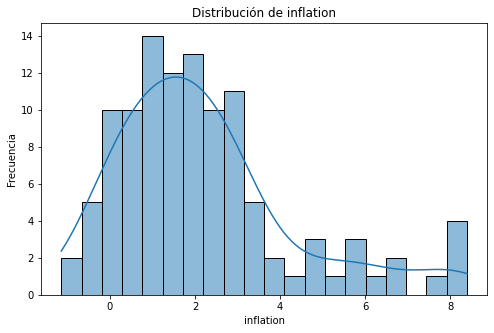

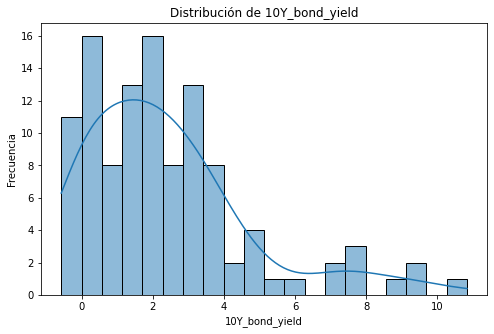

In [45]:
# Distribución de variables
    
# Función para graficar distribuciones
def plot_distributions(df, columns, bins=20):
    for col in columns:
        plt.figure(figsize=(8,5))
        sns.histplot(df[col], bins=bins, kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

plot_distributions(df_data, numeric_cols)

**Interpretación:**

Se crearon histogramas para observar la distribución de las variables `inflation` y `10Y_bond_yield`.

- **Inflación (`inflation`)**
  - La mayoría de los valores se concentran entre **0% y 3%**, mostrando que la mayoría de los países tienen niveles moderados de inflación.
  - Hay algunos **valores extremos** superiores a 5% y valores negativos, que corresponden a periodos de alta inflación o deflación, respectivamente.
  - La forma del histograma sugiere un **sesgo a la derecha**: la cola derecha es más larga debido a los valores altos de inflación en ciertos años o países.

- **Rendimientos de bonos a 10 años (`10Y_bond_yield`)**
  - La mayoría de los bonos se encuentran entre **0% y 4%**, reflejando tasas bajas en países desarrollados.
  - Algunos valores muy altos (cercanos a 10%) corresponden a bonos de economías emergentes o de mayor riesgo.
  - También se observa un **sesgo a la derecha**, con la cola del histograma extendiéndose hacia los valores más altos de rendimiento.

**Conclusión:**
- Ambos histogramas muestran **concentración de la mayoría de los datos en rangos moderados**, pero con **colas hacia valores extremos**, indicando la presencia de outliers.
- Esto sugiere que, al analizar la relación entre inflación y bonos, es importante tener en cuenta estas diferencias entre países y posibles valores atípicos que podrían afectar medidas como la media.

### 3. Tendencias temporales por país

Se analiza cómo evolucionan la inflación y los bonos a 10 años a lo largo del tiempo para cada país.

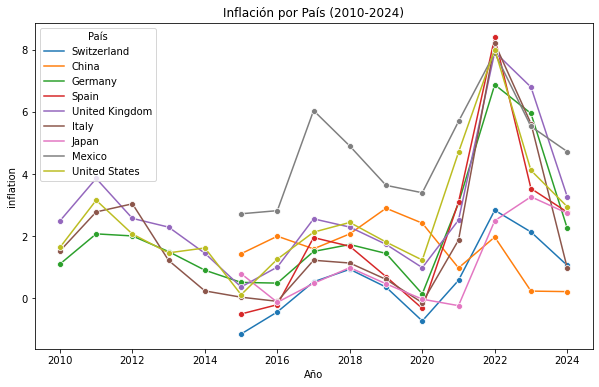

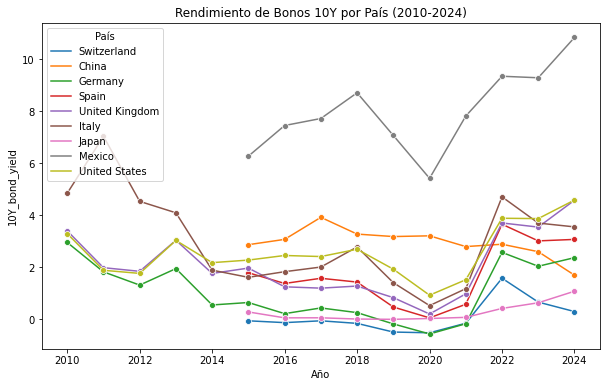

In [46]:
# Función para series/tendencias temporales por país
def plot_time_series(df, y_col, title):
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x='year', y=y_col, hue='country', marker='o')
    plt.title(title)
    plt.xlabel('Año')
    plt.ylabel(y_col)
    plt.legend(title='País')
    plt.show()
    
plot_time_series(df_data, 'inflation', 'Inflación por País (2010-2024)')
plot_time_series(df_data, '10Y_bond_yield', 'Rendimiento de Bonos 10Y por País (2010-2024)')

**Interpretación de los gráficos:**

- **Inflación:**  
  - Entre 2010 y 2020, la mayoría de los países mantuvieron niveles de inflación relativamente estables, reflejo de políticas monetarias acomodaticias y baja presión de demanda.
  - A partir de 2021–2022, se observa un salto abrupto en la inflación en casi todas las economías analizadas, destacando EE.UU., Reino Unido y México.
    Este repunte coincide con:
     - La salida de la pandemia.
     - Estímulos fiscales masivos.
     - Problemas en las cadenas de suministro.
     - Aumento de precios energéticos y geopolítica (como la guerra en Ucrania).
     
  - Países como EE.UU., Reino Unido y México muestran picos más pronunciados, mientras que Suiza y Japón mantienen niveles bajos, reflejando enfoques monetarios más conservadores.

- **Rendimientos de bonos 10 años:**  
  - Países con mayor inflación como EE.UU. y Reino Unido muestran fluctuaciones más marcadas, especialmente tras 2020.
  - Japón y Suiza destacan por su estabilidad prolongada, con rendimientos bajos que reflejan políticas de tipos negativos o cercanos a cero, lo que indica políticas monetarias ultra acomodaticias y baja presión inflacionaria.
  - El aumento de rendimientos en 2022–2023 sugiere un endurecimiento monetario global frente a la inflación.
 

**Conclusión:**  
- La inflación descontrolada obliga a los países a ajustar sus políticas monetarias, y eso se refleja directamente en el mercado de bonos.
- También nos permite comparar cómo cada país responde a las crisis económicas: algunos con medidas fuertes (como EE.UU. y Reino Unido), otros con más cautela (como Japón y Suiza).

### 4. Correlación entre inflación y rendimiento de los bonos a 10 años

Para entender cómo se relacionan las variables, se realizan:

- **Matrices de correlación**: muestran el grado de relación lineal entre variables numéricas.
- **Scatter plots**: permiten visualizar la relación entre dos variables, incluyendo posibles outliers.
- **Heatmaps**: representan gráficamente la matriz de correlación, facilitando la interpretación de tendencias.

Matriz de correlación:
                 inflation  10Y_bond_yield
inflation        1.000000        0.606217
10Y_bond_yield   0.606217        1.000000


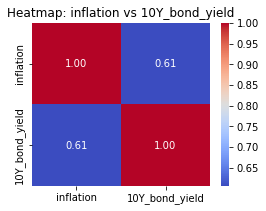

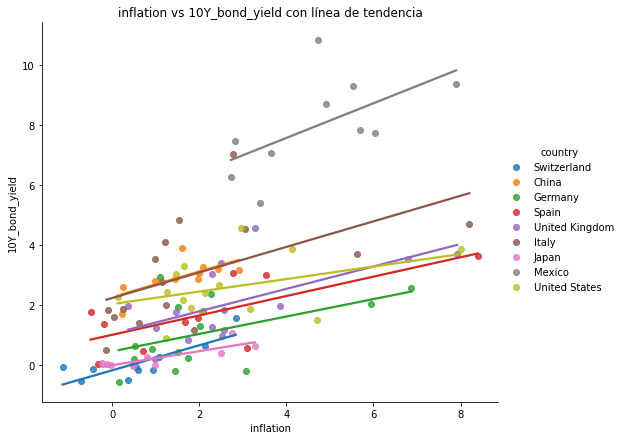

,inflation,10Y_bond_yield
inflation,1.000000,0.606217
10Y_bond_yield,0.606217,1.000000


In [71]:
# Función para la correlacion entre inflacion y bonos

def plot_correlation_with_trend_and_heatmap(df, col_x, col_y):
    """
    Calcula la correlación entre dos columnas, muestra un scatter plot
    con línea de tendencia y un heatmap de correlación.
    
    Parámetros:
    df : DataFrame
    col_x : nombre de la primera columna
    col_y : nombre de la segunda columna
    """
    # 1. Matriz de correlación
    correlation = df[[col_x, col_y]].corr()
    print("Matriz de correlación:\n", correlation)
    
    # 2. Heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f'Heatmap: {col_x} vs {col_y}')
    plt.show()
    
    # 3. Scatter plot con línea de tendencia
    sns.lmplot(
        data=df, x=col_x, y=col_y, hue='country', height=6, aspect=1.2, markers='o', ci=None
    )
    plt.title(f'{col_x} vs {col_y} con línea de tendencia')
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()
    
    return correlation

plot_correlation_with_trend_and_heatmap(df_data, 'inflation', '10Y_bond_yield')

**Interpretación:**

- La correlación entre `inflation` y `10Y_bond_yield` es **0.606**, lo que indica una **relación positiva moderada**.  
- Esto significa que, en general, cuando la inflación aumenta en un país, el rendimiento de los bonos a 10 años también tiende a aumentar.  
- Sin embargo, el valor **no es cercano a 1**, por lo que la relación no es perfecta y pueden existir años o países donde la tendencia no se cumpla estrictamente como observamos en el gráfico. 
- Las diagonales de la matriz son siempre 1, ya que cada variable está perfectamente correlacionada consigo misma.

**Conclusión:**  
Existe una **tendencia positiva** entre inflación y rendimientos de bonos a largo plazo, lo que es consistente con la teoría económica: mayores niveles de inflación suelen ir acompañados de mayores tasas de interés en los bonos para compensar la pérdida de poder adquisitivo.

## 5. Detección de outliers

Se visualizan las dos variables numéricas de interés para comparar la presencia de outliers:


In [80]:
def plot_outliers(df, cols, by=None):
    """
    Dibuja boxplots para detectar outliers.

    Parámetros:
    df : DataFrame
    cols : lista de columnas numéricas a analizar
    by : None, 'country' o 'year'
        None -> boxplot global combinado
        'country' -> boxplot por país
        'year' -> boxplot por año
    """
    if by is None:
        # Boxplot global combinado
        plt.figure(figsize=(10,6))
        sns.boxplot(data=df[cols])
        plt.title("Boxplot combinado de variables numéricas (global)")
        plt.xlabel("Variable")
        plt.ylabel("Valor")
        plt.show()
    else:
        for col in cols:
            plt.figure(figsize=(12,6))
            sns.boxplot(data=df, x=by, y=col)
            plt.title(f'Boxplot de {col} por {by}')
            plt.xlabel(by.capitalize())
            plt.ylabel(col)
            if by in ['country', 'year']:
                plt.xticks(rotation=90)
            plt.show()

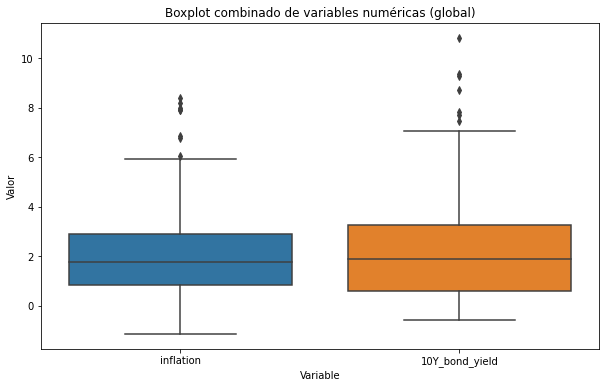

In [79]:
# 1. Boxplot global
plot_outliers(df_data, ['inflation', '10Y_bond_yield'], by=None)

**Interpretación de inflación:**
- La mediana de la inflación está en un nivel bajo, lo que indica que la mayoría de los países tienen una inflación moderada.

- Hay varios outliers (puntos fuera del rango), lo que sugiere que algunos países han tenido inflaciones muy altas en ciertos años.

- La caja es relativamente estrecha, lo que indica que la inflación está concentrada en un rango reducido para la mayoría de los casos.

**Interpretacion de Rendimiento de Bonos a 10 años**
- La mediana del rendimiento es más alta que la de la inflación, como es esperable en mercados donde los bonos compensan el riesgo inflacionario.

- También hay outliers, lo que indica que algunos países han ofrecido rendimientos muy altos o muy bajos en ciertos momentos.

- La caja es más amplia que la de la inflación, lo que muestra una mayor variabilidad entre países o años.

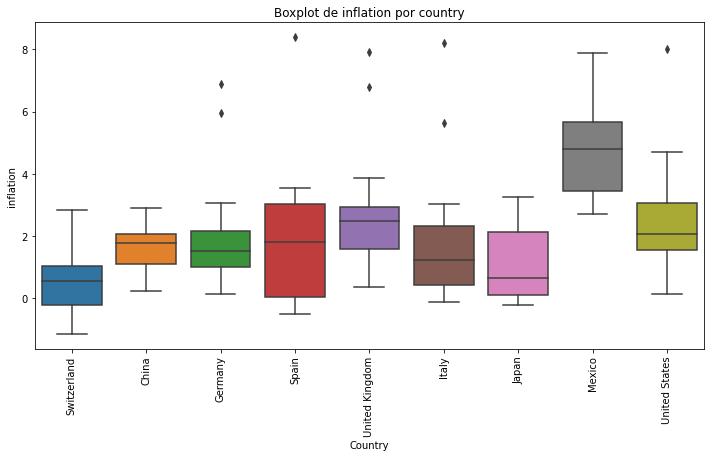

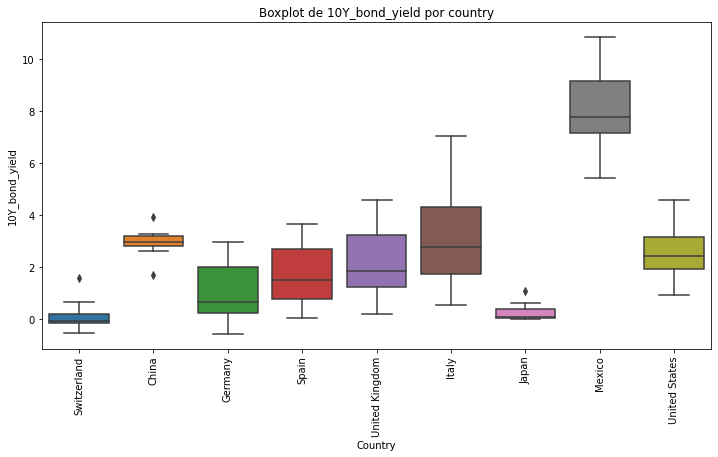

In [77]:
# 2. Boxplot por país
plot_outliers(df_data, ['inflation', '10Y_bond_yield'], by='country')

**Interpretación de inflación:**

Países con baja inflación y poca variabilidad:

- Suiza y China tienen medianas bajas y rangos estrechos, lo que indica estabilidad.

Países con inflación más alta y volátil:

- México y Japón presentan medianas más altas y cajas más amplias, lo que sugiere mayor variabilidad en la inflación.

Outliers (valores atípicos):

- Algunos países tienen puntos fuera del rango normal, lo que indica episodios de inflación inusualmente alta.


**Interpretacion de Rendimiento de Bonos a 10 años**

Este gráfico refleja cuánto rinden los bonos soberanos a largo plazo, lo cual está ligado a la percepción de riesgo e inflación futura:

Rendimientos bajos o negativos:

- Japón tiene una mediana negativa, lo que refleja políticas monetarias ultraexpansivas.

- Suiza también tiene rendimientos muy bajos, lo que sugiere alta confianza y baja inflación esperada.

Rendimientos altos:

- Estados Unidos lidera con una mediana cercana a 10, lo que puede reflejar expectativas de inflación o riesgo país.

- México también tiene rendimientos elevados, posiblemente por riesgo soberano o inflación estructural.

Estabilidad vs. volatilidad:

- China muestra una caja estrecha, lo que indica rendimientos estables.

- Italia y España tienen más dispersión, lo que puede reflejar incertidumbre económica.

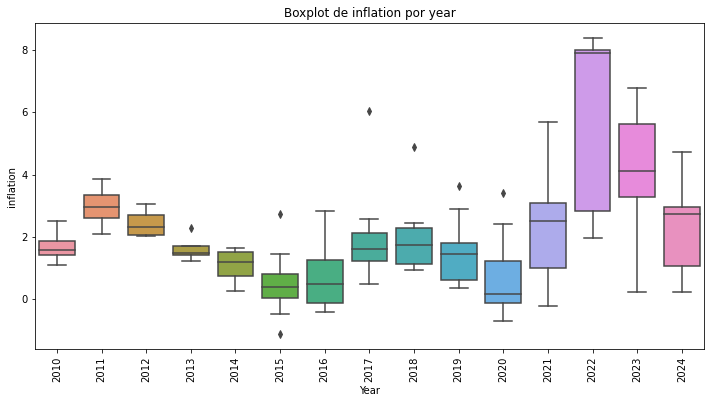

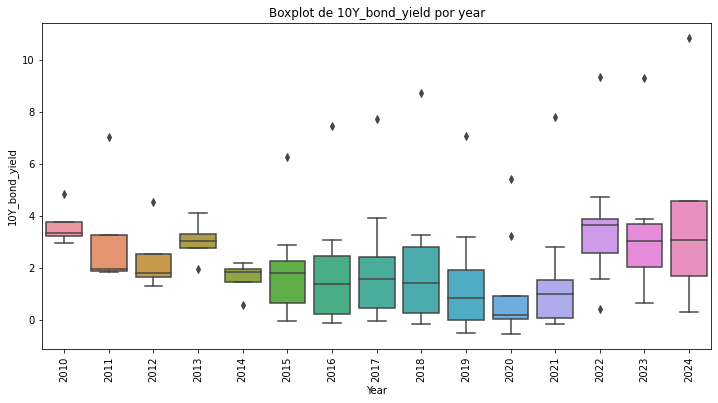

In [78]:
# 3. Boxplot por año
plot_outliers(df_data,['inflation', '10Y_bond_yield'], by='year')

**Interpretación en inflación por año**

- Entre 2010 y 2020, la inflación muestra una variabilidad moderada, con medianas relativamente estables.

- A partir de 2021, se observa un aumento en la mediana y en la dispersión, alcanzando picos en 2022 y 2023. Esto sugiere un periodo de mayor volatilidad económica, posiblemente vinculado a eventos globales como la pandemia o tensiones geopolíticas.

- Sin embargo, también se identifican outliers en años anteriores, como 2015, 2017, 2018, 2019 y 2020 (pero no de forma masiva), lo que indica que incluso en periodos de aparente estabilidad hubo episodios de inflación inusualmente alta o baja. Estos valores atípicos podrían estar relacionados con fluctuaciones en los precios del petróleo, políticas monetarias específicas o shocks externos.

**Interpretacion de Rendimiento de Bonos a 10 años por año** 

- Desde 2010 hasta 2020, se observa una tendencia descendente en los rendimientos, reflejando un entorno de tipos de interés bajos y expectativas de inflación contenida.

- A partir de 2021, hay un ligero repunte y mayor dispersión, lo que sugiere una reacción del mercado ante el aumento de la inflación y posibles ajustes en la política monetaria.

- También se presentan outliers más frecuentes y distribuidos en varios años. 

## <span style="color:SteelBlue">Modelos de Series Temporales</span>